In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_theme(style="whitegrid")

# Loading the data
df = pd.read_csv('Cleaned_datasets/Combined_CleanData_V2.csv')

In [2]:
# This will make sure we are getting full view of targetted rows 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Univariate data analysis

In [3]:
# Checking the shape of the dataframe
df.shape

(3796, 25)

In [4]:
# Information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_name        3796 non-null   object 
 1   Property_Type        3796 non-null   object 
 2   society              3795 non-null   object 
 3   sector               3796 non-null   object 
 4   price                3796 non-null   float64
 5   Price_Per_SQFT       3796 non-null   float64
 6   bedRoom              3796 non-null   float64
 7   bathroom             3796 non-null   float64
 8   balcony              3796 non-null   object 
 9   address              3787 non-null   object 
 10  floorNum             3796 non-null   int64  
 11  facing               2695 non-null   object 
 12  agePossession        3796 non-null   object 
 13  description          3796 non-null   object 
 14  rating               3455 non-null   object 
 15  super_built_up_area  1914 non-null   f

In [5]:
# Checking first 3 rows of the dataframe
df.head(3)

,property_name,Property_Type,society,sector,price,Price_Per_SQFT,bedRoom,bathroom,balcony,address,floorNum,facing,agePossession,description,rating,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,2 BHK Flat in Krishna Colony,flat,maa bhagwati residency,sector 7,0.45,5000.0,2.0,2.0,1,"Krishna Colony, Gurgaon, Haryana",4,West,Relatively New,So with lift.Maa bhagwati residency is one of ...,"['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,900.0,0,0,0,0,0,2,28.0
1,2 BHK Flat in Ashok Vihar,flat,apna enclave,sector 3,0.50,7692.0,2.0,2.0,1,"46b, Ashok Vihar, Gurgaon, Haryana",1,West,Old Property,"Property situated on main road, railway statio...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,650.0,0,0,0,0,0,0,37.0
2,2 BHK Flat in Sohna,flat,tulsiani easy in homes,sector 1,0.40,6722.0,2.0,2.0,3,"Sohna, Gurgaon, Haryana",12,NaN,New Property,"This property is 15 km away from badshapur, gu...","['Environment4 out of 5', 'Safety4 out of 5', ...",NaN,NaN,595.0,0,0,0,0,0,2,36.0


- What is frequency count of flats and Independent houses in our dataframe ?
- Out of flats and houses which one have more price ?

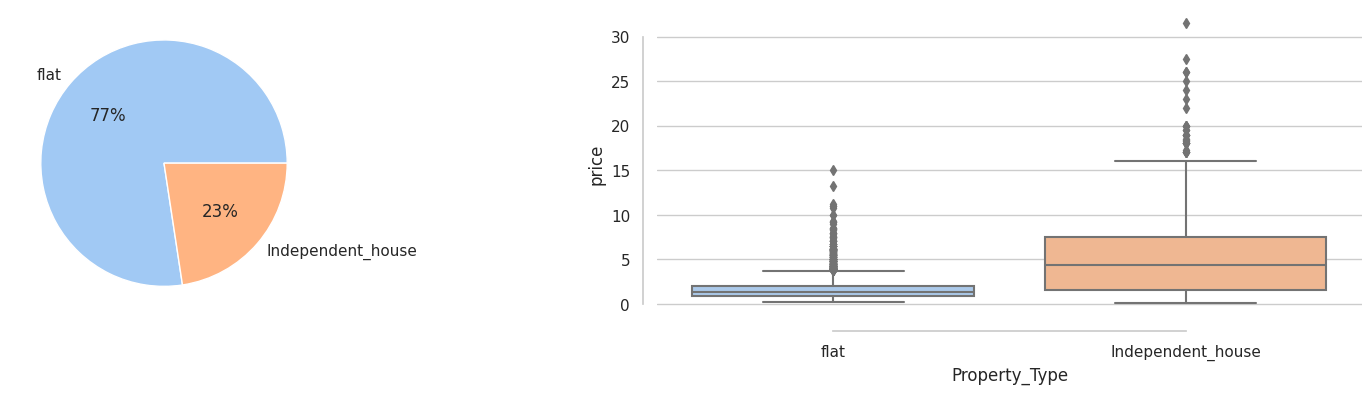

In [6]:
fig,ax = plt.subplots(1,2,figsize=(20,4))

colors = sns.color_palette('pastel')[0:7]
ax[0].pie(x = df['Property_Type'].value_counts().values, labels = df['Property_Type'].value_counts().index, colors = colors, autopct='%.0f%%')


sns.boxplot(x="Property_Type", y="price", palette=sns.color_palette("pastel"),ax = ax[1],data=df)
sns.despine(offset=10, trim=True)

plt.show()

# Feature : price

In [7]:
print("Missing values in price feature are : ",df['price'].isnull().sum())
df['price'].describe()

Missing values in price feature are :  0


count    3796.000000
mean        2.511185
std         2.938181
min         0.070000
25%         0.940000
50%         1.505000
75%         2.750000
max        31.500000
Name: price, dtype: float64

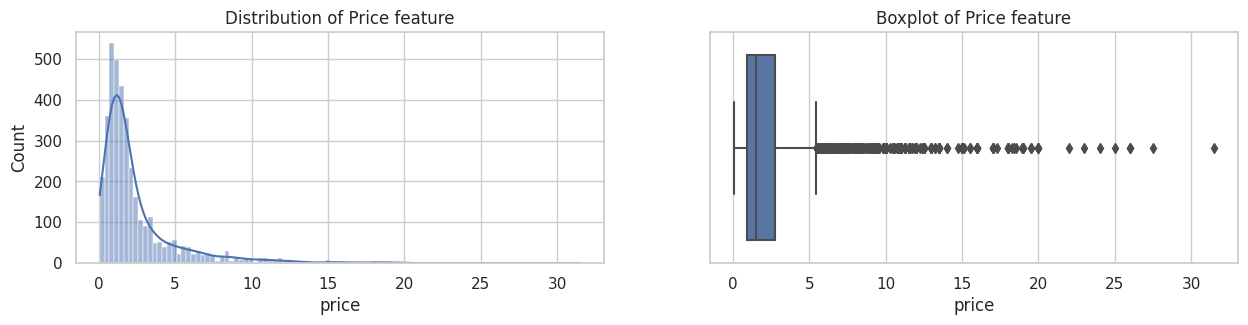

In [8]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['price'],kde=True,ax = ax[0],bins=100)
ax[0].set_title("Distribution of Price feature")

sns.boxplot(x = df['price'],ax = ax[1])
ax[1].set_title("Boxplot of Price feature")
plt.show()

### Observations (Feature : price) 🕵🏼

**Descriptive Statistics**:

- Count: There are 3796 non-missing price entries.
- Mean Price: The average price is approximately 2.51 crores.
- Median Price: The median (or 50th percentile) price is 1.50 crores.
- Since there is a significant difference between the mean and the 50% percentile value of `price` feature, thus there may be a possibility of outliers. This is because outliers can skew the mean value, making it different from the median value.
- Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
- Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.

**Distribution**: 
- The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
- Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

# Feature : Price_Per_SQFT

In [9]:
print("Missing values in Price_Per_SQFT feature are : ",df['Price_Per_SQFT'].isnull().sum())
df['Price_Per_SQFT'].describe()

Missing values in Price_Per_SQFT feature are :  0


count      3796.000000
mean      13744.074025
std       22624.518887
min           4.000000
25%        6812.000000
50%        9013.500000
75%       13888.000000
max      600000.000000
Name: Price_Per_SQFT, dtype: float64

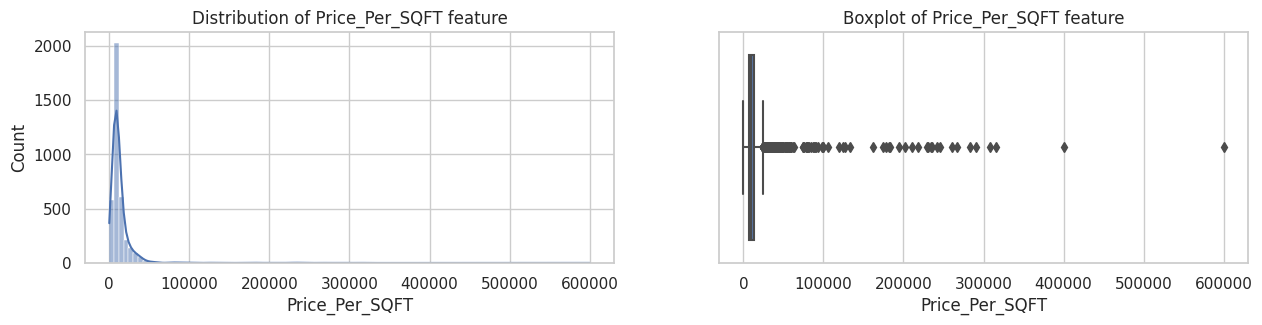

In [10]:
fig,ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(x=df['Price_Per_SQFT'],kde=True,ax = ax[0],bins=100)
ax[0].set_title("Distribution of Price_Per_SQFT feature")

sns.boxplot(x = df['Price_Per_SQFT'],ax = ax[1])
ax[1].set_title("Boxplot of Price_Per_SQFT feature")
plt.show()

### Observations (Feature : price) 🕵🏼

**Descriptive Statistics**:

- Count: There are 3796 non-missing price entries.
- Mean Price: The average price is approximately Rs 13744.
- Median Price: The median (or 50th percentile) price is Rs 9013.
- Since there is a significant difference between the mean and the 50% percentile value of `Price_Per_SQFT` feature, thus there may be a possibility of outliers. This is because outliers can skew the mean value, making it different from the median value.
- Standard Deviation: The prices have a standard deviation of Rs 22624, indicating variability in the prices.
- Range: Prices range from a minimum of Rs 4 crores to a maximum of Rs 600000.

# Feature : bedRoom,bathRoom and balcony

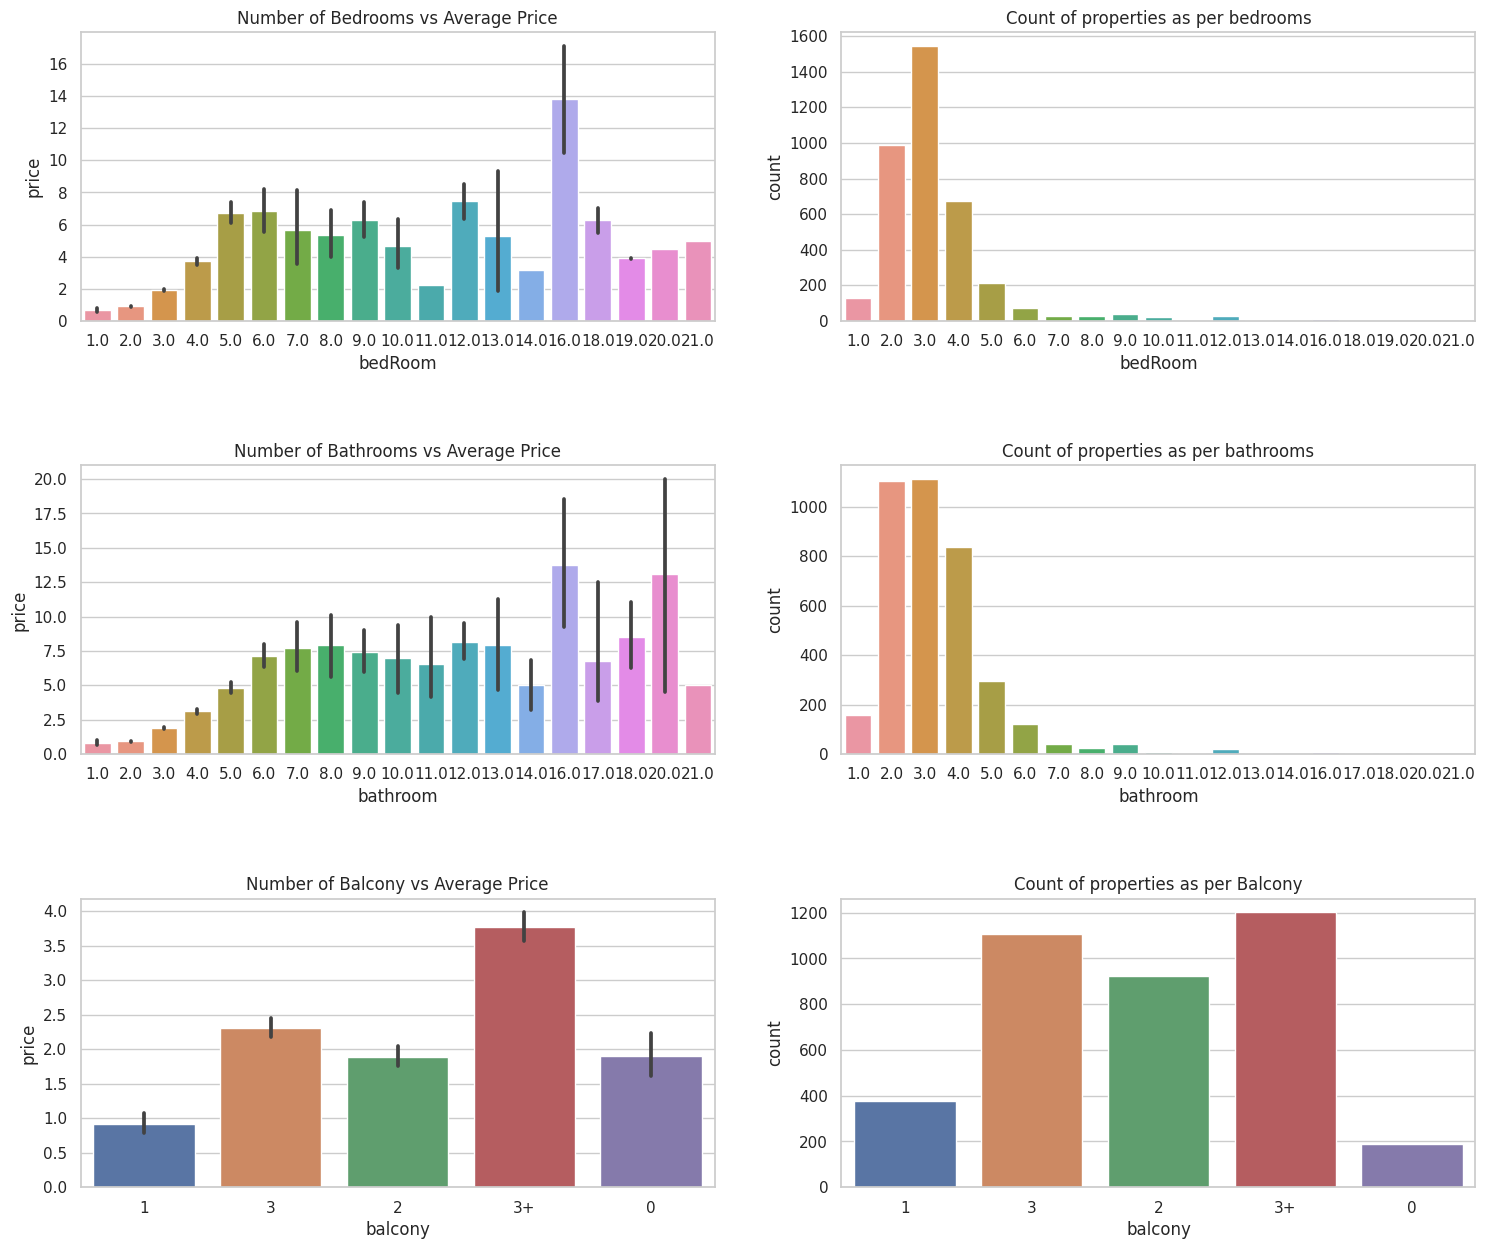

In [24]:
fig,ax = plt.subplots(3,2,figsize=(18,15))

sns.barplot(data=df, x="bedRoom", y="price",ax = ax[0][0])
ax[0][0].set_title("Number of Bedrooms vs Average Price")
sns.countplot(x=df["bedRoom"],ax = ax[0][1])
ax[0][1].set_title("Count of properties as per bedrooms")

sns.barplot(data=df, x="bathroom", y="price",ax = ax[1][0])
ax[1][0].set_title("Number of Bathrooms vs Average Price")
sns.countplot(x=df["bathroom"],ax = ax[1][1])
ax[1][1].set_title("Count of properties as per bathrooms")

sns.barplot(data=df, x="balcony", y="price",ax = ax[2][0])
ax[2][0].set_title("Number of Balcony vs Average Price")
sns.countplot(x=df["balcony"],ax = ax[2][1])
ax[2][1].set_title("Count of properties as per Balcony")

plt.subplots_adjust(hspace = 0.5)
plt.show()

# Feature : floorNum and facing
- How price vary with the floor number and facing ?
- Most of the flats are on which floor number ?
- Most of the properties are facing which direction?

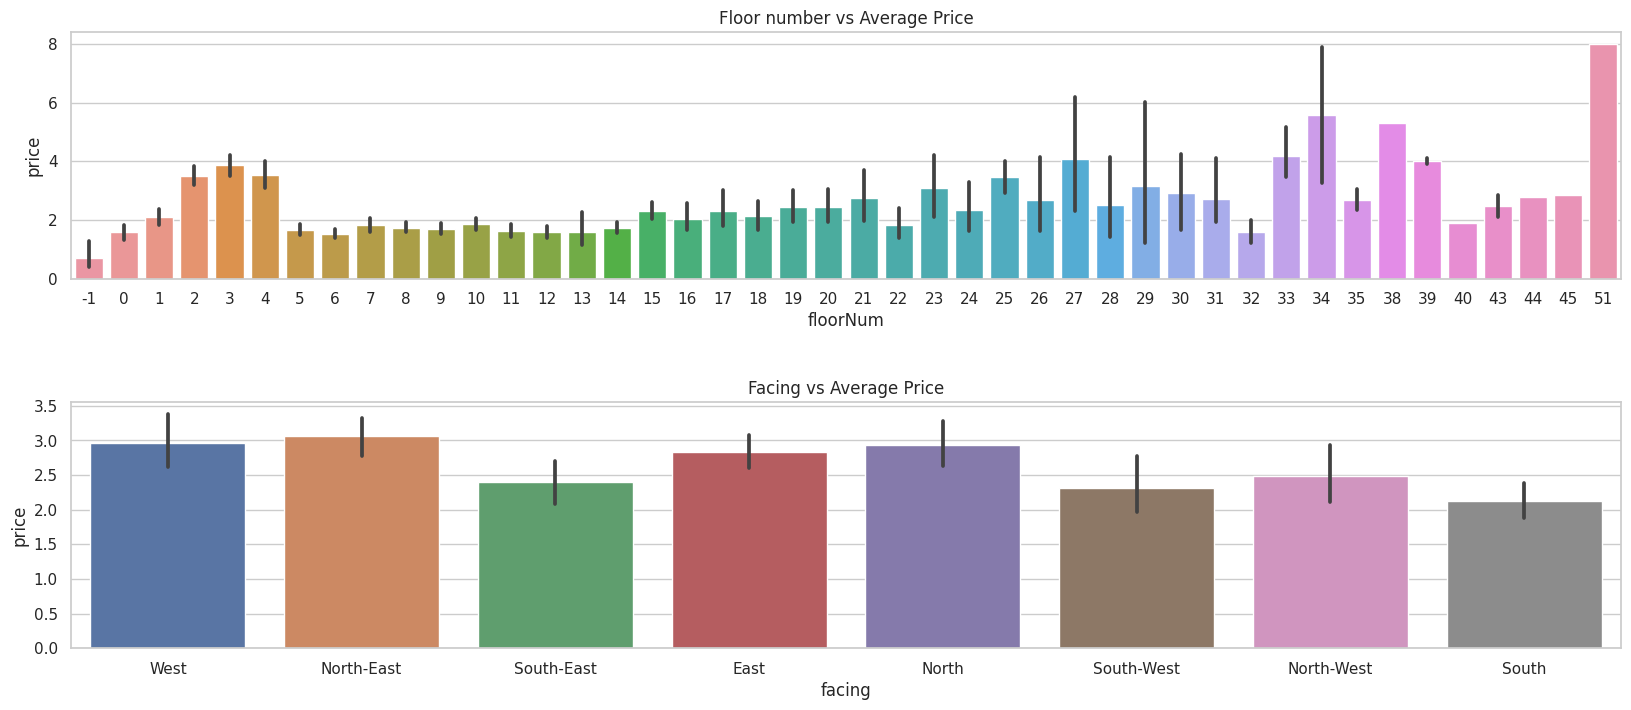

In [49]:
fig,ax = plt.subplots(2,1,figsize=(20,8))

sns.barplot(data=df, x="floorNum", y="price",ax = ax[0])
ax[0].set_title("Floor number vs Average Price")
sns.barplot(data=df, x="facing", y="price",ax = ax[1])
ax[1].set_title("Facing vs Average Price")

plt.subplots_adjust(hspace = 0.5)
plt.show()